# Machine Learning - Exercise 5
# Linear Classification

Testing linear discriminant models: Least Square, Simple Perceptron, Fisher Discriminant

## Import 

Import libraries that contains the implementations of the functions used in the rest of the program.



In [30]:
import random
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

print("Libraries imported.")

Libraries imported.


# Data set


Data-generation function

In [2]:
# Param: n=size of data set, outliers=True/False
def generateData(n, outliers=False):
    X = np.ndarray((n,2))
    t = np.ndarray((n,1))
    n1 = int(n*0.5)

    # define random centers of distributions far away
    
    for i in range(0,n1):
        X[i,:] = np.random.normal((2.0,8.5),0.5,size=(1,2))
        t[i] = -1
    for i in range(n1,n):
        X[i,:] = np.random.normal((4.0,5.0),0.3,size=(1,2))
        t[i] = 1
    
    if (outliers):
        no=int(n*0.9)
        for i in range (no,n):
            X[i,:] = np.random.normal((9.0,3.0),0.2,size=(1,2))
            t[i] = 1

    return [X,t]

Generate n data points with/without outliers

In [8]:
n = 100
outliers = True
np.random.seed(123)

X, t = generateData(n, outliers=outliers)

# print specs
print("Input shape: %s" %str(X.shape))
print("Output shape: %s" %str(t.shape))
print("Number of attributes/features: %d" %(X.shape[1]))
print("Number of classes: %d" %(len(np.unique(t))))
print("Number of samples: %d" %(X.shape[0]))

# show an example
id = random.randrange(0,X.shape[0])

print("Example:")
print("x%d = %r" %(id,X[id]))
print("y%d = %r" %(id,t[id]))

Input shape: (100, 2)
Output shape: (100, 1)
Number of attributes/features: 2
Number of classes: 2
Number of samples: 100
Example:
x24 = array([2.489368  , 9.61907167])
y24 = array([-1.])


# Plot functions

In [4]:
# Plot data
def plotData(X,t,XNr=None,XNg=None,label='Data'):
    Xr = np.ndarray((0,2))
    Xg = np.ndarray((0,2))
    for i in range(0,len(X)):
        if (t[i][0]==1):
            Xr = np.vstack([Xr, [X[i,0],X[i,1]]])
        else:
            Xg = np.vstack([Xg, [X[i,0],X[i,1]]])
            
    if (not XNr is None):
        plt.plot(XNr[:,0],XNr[:,1],'.', color='#FFAAAA')
    if (not XNg is None):
        plt.plot(XNg[:,0],XNg[:,1],'.', color='#AAFFAA')

    plt.plot(Xr[:,0],Xr[:,1],'ro')
    plt.plot(Xg[:,0],Xg[:,1],'go')
    plt.axis([0,10,0,10])
    plt.title(label)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()
    
# Plot results of a solution
def plotResult(X, t, classifier, label):
    XNr = np.ndarray((0,2))
    XNg = np.ndarray((0,2))

    for u in np.arange(0,10,0.1):
        for v in np.arange(0,10,0.1):
            xn = np.array([[u, v]])
            yn = classifier.predict(xn)
            if (yn<0):
                XNg = np.vstack([XNg, [u,v]])
            else:
                XNr = np.vstack([XNr, [u,v]])
        
    plotData(X,t,XNr,XNg,label)

# Draw the dataset

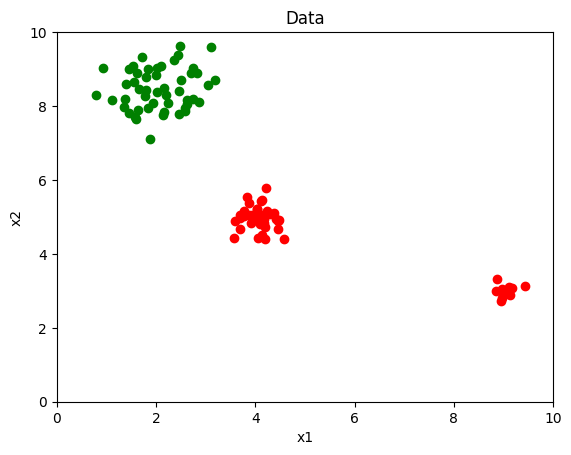

In [9]:
plotData(X,t)

# Model

## Training models

* Least Square
* Simple Perceptron
* Fisher Discriminant




In [182]:
class LeastSquare:

    def __init__(self):
        self.w = [0, 0, 0]

    def fit(self,X,t):
        n = len(X) # nr. of examples
        t2 = np.c_[t, 1-t] # t2 is T: 1-of-K encoding
        phi = np.c_[np.ones(n), X] # design matrix
        self.w = np.matmul(np.linalg.pinv(phi),t2) # Least square solution
        #print("Least square solution: %s" %(str(self.w.transpose())))

    def predict(self,x):
        xn = np.array((1, x[0], x[1]))
        yn = np.matmul(self.w.transpose(),xn)
        if yn[0]>yn[1]:
            return 1
        else:
            return -1

In [183]:
class SimplePerceptron:

    def __init__(self, eta=0.01, niter=100):
        self.eta = eta
        self.niter = niter
        self.w = np.zeros(3)
    
    def fit(self,X,t):
        #print('Perceptron model - eta: %f, niter: %d' %(self.eta, self.niter))
        n = len(X)
        # initial solution
        self.w = np.random.random()*np.ones(3)
        # niter iterations
        for i in range (0,self.niter):
            # select an instance
            k = int(np.random.random()*n)
            xk = np.array([1,X[k][0],X[k][1]])
            if (t[k]==1):
                tk = 1
            else:
                tk = -1
            # output
            o = np.sign(np.dot(self.w,xk))  # thresholded
            # update weigths
            self.w = self.w + self.eta * (tk-o) * xk
        print("Perceptron solution: %s" %str(self.w.transpose()))

    def predict(self,x):
        xn = np.array((1, x[0], x[1]))
        yn = np.matmul(self.w.transpose(),xn)        
        return np.sign(yn)

In [184]:
class FisherDiscriminant:

    def __init__(self):
        self.w = [0, 0, 0]
        self.label = "Fisher Discriminant"

    def fit(self,X,t):
        n = len(X)  # num of examples
        # group the two subsets 
        # C1 = positive samples, C2 = negative samples
        C1 = np.ndarray((0,2))
        C2 = np.ndarray((0,2))
        for i in range(0,len(X)):
            if (t[i] == 1):
                C1 = np.vstack([C1, [X[i,0],X[i,1]]])
            else:
                C2 = np.vstack([C2, [X[i,0],X[i,1]]])			
        
        # compute means m1, m2
        m1 = np.mean(C1, axis=0)
        m2 = np.mean(C2, axis=0)
        
        # compute covariances S1, S2
        S1 = np.zeros((2,2))
        d = np.array(())
        for c in C1:
            d = np.subtract(c,m1).reshape(2,1)
            dt = d.transpose()
            S1 = S1 + np.matmul(d,dt)
        
        S1 = S1/len(C1)
        
        S2 = np.zeros((2,2))
        for c in C2:
            d = np.subtract(c,m2).reshape(2,1)
            dt = d.transpose()
            S2 = S2 + np.matmul(d,dt)
        S2 = S2/len(C2)
        
        # compute Sw matrix
        Sw = S1+S2
        
        # compute solution w 
        wt = np.matmul(np.linalg.inv(Sw),(m1-m2))
        
        # global mean
        mu = m1 * 0.5 + m2 * 0.5
        
        # compute constant term
        w0 = np.dot(wt,mu)
        
        # format the final solution
        self.w = np.array([-w0, wt[0], wt[1]])
        #print("Fisher discriminant solution: %s" %str(self.w.transpose()))

    
    def predict(self,x):
        xn = np.array((1, x[0], x[1]))
        yn = np.matmul(self.w.transpose(),xn)
        if yn>0:
            return 1
        else:
            return -1

## Choose model to evaluate:

* Least Square
* Simple Perceptron
* Perceptron
* Fisher Discriminant
* SVM



In [148]:
classifier_name = 'S'

ClassifierMap = {
    'L': [LeastSquare(), 'Least Square'], 
    'F': [FisherDiscriminant(), 'Fisher Discriminant'], 
    'p': [SimplePerceptron(), 'Simple Perceptron'], 
    'P': [Perceptron(), 'Perceptron'], 
    'S': [svm.LinearSVC(dual=False), 'SVM']
    }

classifier = ClassifierMap[classifier_name][0]

Set further parameters if using Simple Perceptron

In [149]:
eta = 0.001
niter = 1000

if (classifier_name == 'p'):  # SimplePerceptron
    classifier.eta = eta
    classifier.niter = niter

Fit classifier

In [150]:
# train the classifier
# We pass ravel() to t in order to get a Y vector -> Eliminates warning
classifier.fit(X,t.ravel())

LinearSVC(dual=False)

# Visualize results

Define visualization functions

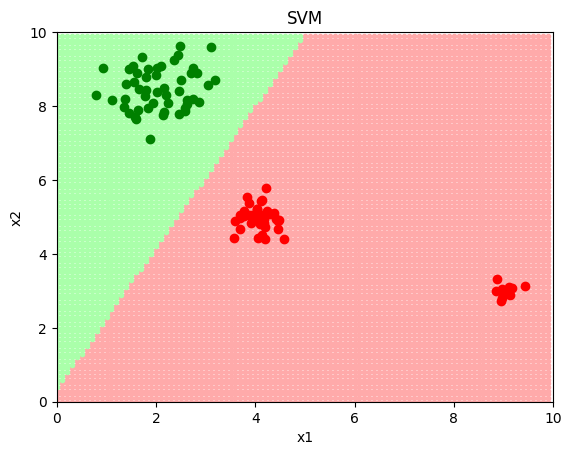

In [124]:
# show results
plotResult(X,t,classifier,ClassifierMap[classifier_name][1])

# Home Exercises

Test robustness to outliers and to noise.
Generate a test set from the same distributions used to generate the training set.

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, t, test_size=0.333, 
                                                    random_state=random.randrange(90))
y_pred = []
print("Size of original Training set: %d" %X.shape[0])
print("Size of splitted Training set: %d" %X_train.shape[0])
print("Size of splitted Test set: %d" %X_test.shape[0])

#'L' -> Least Square
#'F' -> Fisher Discriminant
#'p' -> Simple Perceptron
#'P' -> Perceptron 
#'S' -> SVM
classifier_name = 'L'

classifier = ClassifierMap[classifier_name][0]

classifier.fit(X_train,y_train.ravel())

for s in X_test:
    xn = np.array((1, s[0], s[1]))
    yn = np.matmul(classifier.w.transpose(),xn)
    if yn[0]>yn[1]:
        y_pred.append(1)
    else:
        y_pred.append(1)

acc = accuracy_score(y_pred, y_test)
print("Accuracy %.3f" %acc)

Size of original Training set: 100
Size of splitted Training set: 66
Size of splitted Test set: 34
Least square solution: [[ 3.99147793 -0.1015124  -0.55420027]
 [-2.99147793  0.1015124   0.55420027]]
Accuracy 0.529




**Question 1**

Compare the performance of all the models in presence of outliers. Which methods are robust to outliers?

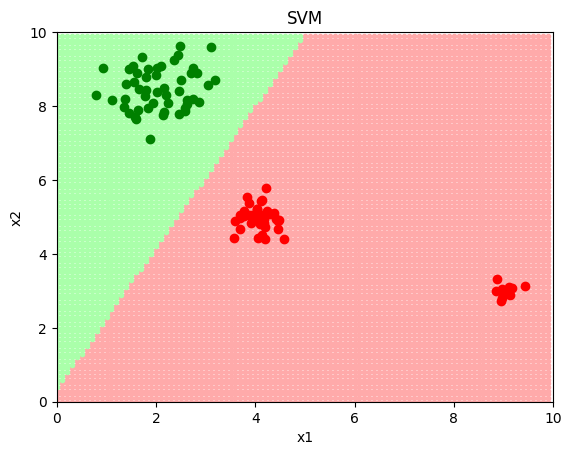

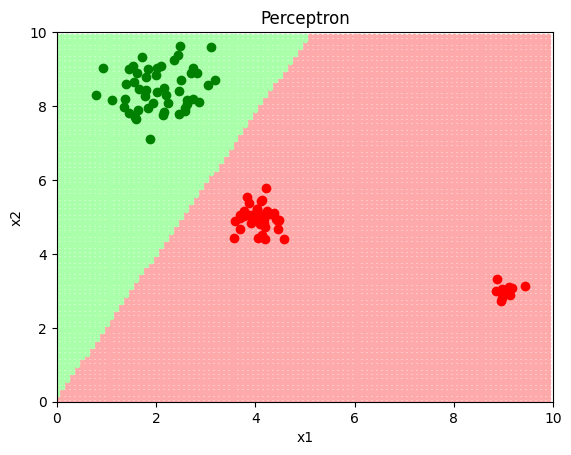

Perceptron model - eta: 0.001000, niter: 1000
Perceptron solution: [ 0.11057374  0.0849497  -0.0518398 ]


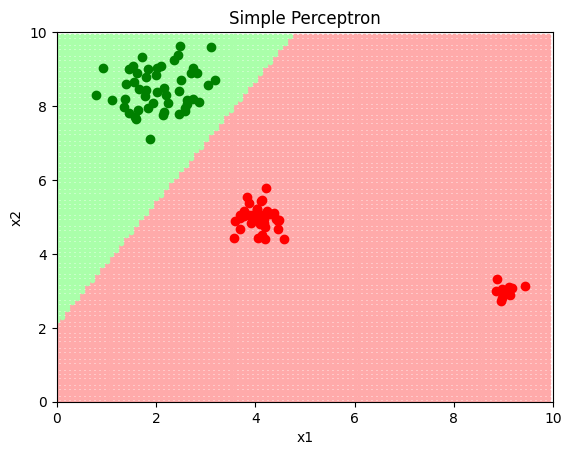

Fisher discriminant solution: [43.98049087 -1.40313899 -5.97613077]


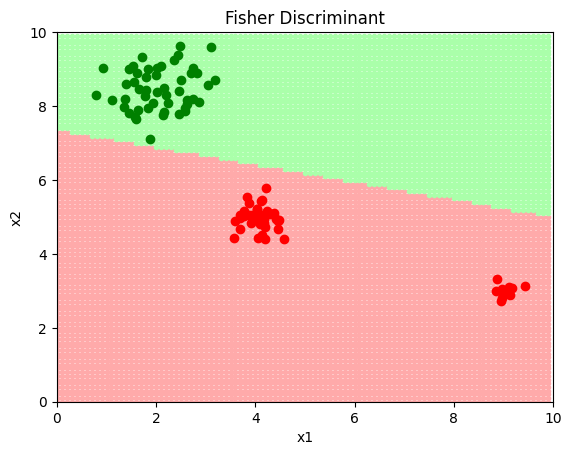

Least square solution: [[ 4.18576652 -0.13354131 -0.56876782]
 [-3.18576652  0.13354131  0.56876782]]


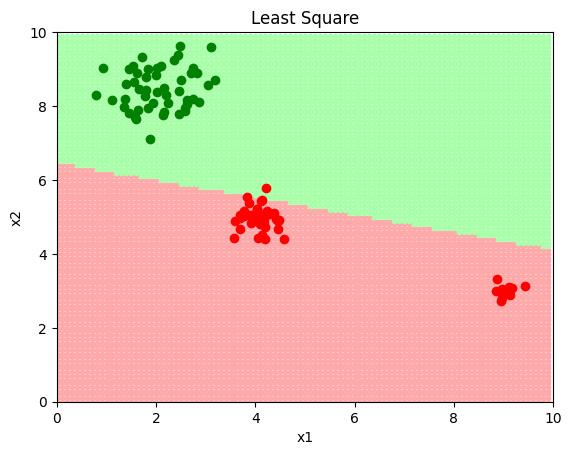

In [82]:
def classifyAndPlot(classifier_name):
    classifier = ClassifierMap[classifier_name][0]

    eta = 0.001
    niter = 1000

    if (classifier_name == 'p'):  # SimplePerceptron
        classifier.eta = eta
        classifier.niter = niter

    classifier.fit(X,t.ravel())

    plotResult(X,t,classifier,ClassifierMap[classifier_name][1])

n = 100
outliers = True
np.random.seed(123)

X, t = generateData(n, outliers=outliers)

#'L' -> Least Square
#'F' -> Fisher Discriminant
#'p' -> Simple Perceptron
#'P' -> Perceptron 
#'S' -> SVM

classifyAndPlot('S')
classifyAndPlot('P')
classifyAndPlot('p')
classifyAndPlot('F')
classifyAndPlot('L')

**Question 2** 

Compare the performance of all the models in presence of noisy labels. Generate a data set with noisy data (assign random labels to a subset gof the dataset).
Plot performace (e.g., accuracy) over percentage of random samples, considering percentage values 0.0, 0.25, 0.5, 0.75, 1.

In [191]:
import pandas as pd

def generateNoisyLabels(percentage, y_train):

    y_train_noisy = np.copy(y_train)

    ix_size = int(percentage * len(y_train_noisy))
    ix = np.random.choice(len(y_train_noisy), size=ix_size, replace=False)
    b = y_train[ix]
    np.random.shuffle(b)
    y_train_noisy[ix] = b

    return y_train_noisy

def generatePredictions(classifier, percentage, ClassifierName):

    y_pred = []

    y_train_noisy = generateNoisyLabels(percentage, y_train)

    if (classifier_name == 'p'):  # SimplePerceptron
        classifier.eta = eta
        classifier.niter = niter
        
    classifier.fit(X_train,y_train_noisy.ravel())

    for s in X_test:
        if(ClassifierName == 'Perceptron' or ClassifierName == 'SVM'):
            yn = classifier.predict(s.reshape(1, -1))
        else:
            yn = classifier.predict(s)
        y_pred.append(yn)

    acc = accuracy_score(y_pred, y_test)
    
    print(F"Accuracy of {ClassifierName} %.3f" %acc)

    return acc
                                    
df = pd.DataFrame({'Classifier': ["LeastSquare", "LeastSquare", "LeastSquare","LeastSquare", "LeastSquare",
                            "FisherDiscriminant", "FisherDiscriminant", "FisherDiscriminant", "FisherDiscriminant", "FisherDiscriminant",
                            "SimplePerceptron", "SimplePerceptron", "SimplePerceptron", "SimplePerceptron", "SimplePerceptron",
                            "Perceptron", "Perceptron", "Perceptron", "Perceptron", "Perceptron",
                            "SVM", "SVM", "SVM", "SVM", "SVM"],
                    'Noise': [0.0, 0.25, 0.50, 0.75, 1.00,
                              0.0, 0.25, 0.50, 0.75, 1.00,
                              0.0, 0.25, 0.50, 0.75, 1.00,
                              0.0, 0.25, 0.50, 0.75, 1.00,
                              0.0, 0.25, 0.50, 0.75, 1.00],
                     'Accuracy': [0,0,0,0,0,
                                  0,0,0,0,0,
                                  0,0,0,0,0,
                                  0,0,0,0,0,
                                  0,0,0,0,0],
                     '': ["","","","","",
                          "","","","","",
                          "","","","","",
                          "","","","","",
                          "","","","",""]
                    })

n = 100
outliers = True
np.random.seed(123)

X, t = generateData(n, outliers=outliers)

X_train, X_test, y_train, y_test = train_test_split(X, t, test_size=0.333, 
                                                    random_state=random.randrange(90))

#######################################
LeastSquareClassifier = LeastSquare()
df.iat[0, 2] = generatePredictions(LeastSquareClassifier, 0.0, "Least Square")
df.iat[1, 2] = generatePredictions(LeastSquareClassifier, 0.25, "Least Square")
df.iat[2, 2] = generatePredictions(LeastSquareClassifier, 0.50, "Least Square")
df.iat[3, 2] = generatePredictions(LeastSquareClassifier, 0.75, "Least Square")
df.iat[4, 2] = generatePredictions(LeastSquareClassifier, 1.00, "Least Square")

print("------------------------------------------------------")

FisherDiscriminantClassifier = FisherDiscriminant()
df.iat[5, 2] = generatePredictions(FisherDiscriminantClassifier, 0.0, "Fisher Discriminant")
df.iat[6, 2] = generatePredictions(FisherDiscriminantClassifier, 0.25, "Fisher Discriminant")
df.iat[7, 2] = generatePredictions(FisherDiscriminantClassifier, 0.50, "Fisher Discriminant")
df.iat[8, 2] = generatePredictions(FisherDiscriminantClassifier, 0.75, "Fisher Discriminant")
df.iat[9, 2] = generatePredictions(FisherDiscriminantClassifier, 1.00, "Fisher Discriminant")

print("------------------------------------------------------")

SimplePerceptronClassifier = SimplePerceptron()
df.iat[10, 2] = generatePredictions(SimplePerceptronClassifier, 0.0, "SimplePerceptron")
df.iat[11, 2] = generatePredictions(SimplePerceptronClassifier, 0.25, "SimplePerceptron")
df.iat[12, 2] = generatePredictions(SimplePerceptronClassifier, 0.50, "SimplePerceptron")
df.iat[13, 2] = generatePredictions(SimplePerceptronClassifier, 0.75, "SimplePerceptron")
df.iat[14, 2] = generatePredictions(SimplePerceptronClassifier, 1.00, "SimplePerceptron")

print("------------------------------------------------------")

PerceptronClassifier = Perceptron()
df.iat[15, 2] = generatePredictions(PerceptronClassifier, 0.0, "Perceptron")
df.iat[16, 2] = generatePredictions(PerceptronClassifier, 0.25, "Perceptron")
df.iat[17, 2] = generatePredictions(PerceptronClassifier, 0.50, "Perceptron")
df.iat[18, 2] = generatePredictions(PerceptronClassifier, 0.75, "Perceptron")
df.iat[19, 2] = generatePredictions(PerceptronClassifier, 1.00, "Perceptron")

print("------------------------------------------------------")

SVMClassifier = svm.LinearSVC(dual=False)
df.iat[20, 2] = generatePredictions(SVMClassifier, 0.0, "SVM")
df.iat[21, 2] = generatePredictions(SVMClassifier, 0.25, "SVM")
df.iat[22, 2] = generatePredictions(SVMClassifier, 0.50, "SVM")
df.iat[23, 2] = generatePredictions(SVMClassifier, 0.75, "SVM")
df.iat[24, 2] = generatePredictions(SVMClassifier, 1.00, "SVM")

df = df.reset_index(drop=True)

max_value = df["Accuracy"].max()

for index, row in df.iterrows():
    modelName = row['Classifier']
    noise = row['Noise']
    accuracy = row['Accuracy']

    if(max_value == accuracy):
        df.iat[index, 3] = "[BEST]"

print(F"\n{df}")

Accuracy of Least Square 0.971
Accuracy of Least Square 0.765
Accuracy of Least Square 0.559
Accuracy of Least Square 0.412
Accuracy of Least Square 0.412
------------------------------------------------------
Accuracy of Fisher Discriminant 1.000
Accuracy of Fisher Discriminant 1.000
Accuracy of Fisher Discriminant 1.000
Accuracy of Fisher Discriminant 1.000
Accuracy of Fisher Discriminant 0.765
------------------------------------------------------
Perceptron solution: [ 0.36921245  0.28314133 -0.20442041]
Accuracy of SimplePerceptron 1.000
Perceptron solution: [ 0.45817811  0.20590802 -0.19546486]
Accuracy of SimplePerceptron 1.000
Perceptron solution: [0.05345918 0.05219045 0.13141244]
Accuracy of SimplePerceptron 0.588
Perceptron solution: [ 0.5281837   0.07218511 -0.05176948]
Accuracy of SimplePerceptron 0.588
Perceptron solution: [ 0.3741001  -0.11964666 -0.12844901]
Accuracy of SimplePerceptron 0.412
------------------------------------------------------
Accuracy of Perceptron 